# About Dataset
## Context
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

## Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors


---

## **Data Understanding**

- **Country**: Country name.
- **Year**: Year of the record.
- **Status**: Country's development status (Developed or Developing).
- **Life expectancy**: Life expectancy in years.
- **Adult Mortality**: Adult mortality rates for both sexes (probability of dying between 15 and 60 years per 1000 population).
- **Infant Deaths**: Number of infant deaths per 1000 population.
- **Alcohol**: Alcohol consumption per capita (15+) in litres of pure alcohol.
- **Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita (%).
- **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%).
- **Measles**: Number of reported cases of measles per 1000 population.
- **BMI**: Average Body Mass Index of the population.
- **Under-five Deaths**: Number of deaths for children under five years per 1000 population.
- **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%).
- **Total Expenditure**: General government expenditure on health as a percentage of total government expenditure (%).
- **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).
- **HIV/AIDS**: Deaths per 1000 live births caused by HIV/AIDS (ages 0-4 years).
- **GDP**: Gross Domestic Product per capita (in USD).
- **Population**: Total population of the country.
- **Thinness 1-19 Years**: Prevalence of thinness among children and adolescents aged 10 to 19 (%).
- **Thinness 5-9 Years**: Prevalence of thinness among children aged 5 to 9 (%).
- **Income Composition of Resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1).
- **Schooling**: Average number of years of schooling.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")




In [2]:
data = pd.read_csv('./data/Life_Expectancy_Data.csv')
data.shape




(1649, 22)

In [3]:
# Criar um novo dataset excluindo variáveis string
data2 = data.select_dtypes(include=['float64', 'int64'])
data2.head()




,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data2.info()
data2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   int64  
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   int64  
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   int64  
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria          

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [5]:
# Replacing the Null Values with mean values of the data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
data2['Life expectancy ']=imputer.fit_transform(data2[['Life expectancy ']])
data2['Adult Mortality']=imputer.fit_transform(data2[['Adult Mortality']])
data2['Alcohol']=imputer.fit_transform(data2[['Alcohol']])
data2['Hepatitis B']=imputer.fit_transform(data2[['Hepatitis B']])
data2[' BMI ']=imputer.fit_transform(data2[[' BMI ']])
data2['Polio']=imputer.fit_transform(data2[['Polio']])
data2['Total expenditure']=imputer.fit_transform(data2[['Total expenditure']])
data2['Diphtheria ']=imputer.fit_transform(data2[['Diphtheria ']])
data2['GDP']=imputer.fit_transform(data2[['GDP']])
data2['Population']=imputer.fit_transform(data2[['Population']])
data2[' thinness  1-19 years']=imputer.fit_transform(data2[[' thinness  1-19 years']])
data2[' thinness 5-9 years']=imputer.fit_transform(data2[[' thinness 5-9 years']])
data2['Income composition of resources']=imputer.fit_transform(data2[['Income composition of resources']])
data2['Schooling']=imputer.fit_transform(data2[['Schooling']])

In [6]:
data.describe(include = object)


,Country,Status
count,1649,1649
unique,133,2
top,Afghanistan,Developing
freq,16,1407


---
# Exploratory Data Analysis

1. Preparação dos Dados


In [7]:
# Limpar os nomes das colunas
data.columns = data.columns.str.strip()

# Tratar valores ausentes para 'GDP' e 'Schooling'
data['GDP'] = data['GDP'].fillna(data['GDP'].median())
data['Schooling'] = data['Schooling'].fillna(data['Schooling'].median())

# Ajustar os nomes das colunas para corresponder ao dataset
selected_columns = [
    'Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
    'infant deaths', 'Alcohol', 'percentage expenditure', 'GDP',
    'Schooling'
]
prepared_data = data[selected_columns]

# Criar atributos adicionais
prepared_data = prepared_data.copy()  # Garante que é uma cópia independente do DataFrame original
prepared_data.loc[:, 'Life_Expectancy'] = prepared_data['Life expectancy']
prepared_data.loc[:, 'GDP_Per_Schooling'] = prepared_data['GDP'] / prepared_data['Schooling']
prepared_data.loc[:, 'Infant_Mortality_Rate'] = prepared_data['infant deaths'] / prepared_data['Life_Expectancy']
prepared_data.loc[:, 'Health_Expenditure_Ratio'] = prepared_data['percentage expenditure'] / prepared_data['GDP']

# Renomear as colunas para consistência
formatted_data = prepared_data.rename(columns={
    'Life expectancy': 'Life_Expectancy',
    'Adult Mortality': 'Adult_Mortality',
    'infant deaths': 'Infant_Deaths',
    'percentage expenditure': 'Percentage_Expenditure'
})

# Remover possíveis duplicatas de colunas para evitar problemas na visualização
formatted_data = formatted_data.loc[:, ~formatted_data.columns.duplicated()]

# Variáveis numéricas principais
key_numeric_variables = ['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 
                         'Alcohol', 'Percentage_Expenditure', 'GDP', 'Schooling']

# Garantir que as variáveis necessárias estão presentes
missing_variables = [var for var in key_numeric_variables if var not in formatted_data.columns]
if missing_variables:
    print(f"As seguintes variáveis estão ausentes: {missing_variables}")

# Normalizar variáveis numéricas principais para análises futuras
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
formatted_data[key_numeric_variables] = scaler.fit_transform(formatted_data[key_numeric_variables])

# Relatório descritivo
descriptive_statistics = formatted_data[key_numeric_variables].describe()

# Exibir estatísticas descritivas
print("Estatísticas descritivas das variáveis principais:")
print(descriptive_statistics)


Estatísticas descritivas das variáveis principais:
       Life_Expectancy  Adult_Mortality  Infant_Deaths      Alcohol  \
count      1649.000000      1649.000000    1649.000000  1649.000000   
mean          0.562273         0.231600       0.020346     0.253258   
std           0.195485         0.173560       0.075529     0.225598   
min           0.000000         0.000000       0.000000     0.000000   
25%           0.453333         0.105263       0.000625     0.044793   
50%           0.615556         0.203601       0.001875     0.211646   
75%           0.688889         0.313019       0.013750     0.410414   
max           1.000000         1.000000       1.000000     1.000000   

       Percentage_Expenditure          GDP    Schooling  
count             1649.000000  1649.000000  1649.000000  
mean                 0.036863     0.046692     0.479993  
std                  0.092780     0.096298     0.169417  
min                  0.000000     0.000000     0.000000  
25%                

In [8]:
data.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [9]:
# Selecionar apenas colunas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação para as colunas numéricas
correlation_matrix = numeric_data.corr()

# Exibir as cinco primeiras linhas
print("Correlation Matrix:")
print(correlation_matrix.head())


Correlation Matrix:
                     Year  Life expectancy  Adult Mortality  infant deaths  \
Year             1.000000         0.050771        -0.037092       0.008029   
Life expectancy  0.050771         1.000000        -0.702523      -0.169074   
Adult Mortality -0.037092        -0.702523         1.000000       0.042450   
infant deaths    0.008029        -0.169074         0.042450       1.000000   
Alcohol         -0.113365         0.402718        -0.175535      -0.106217   

                  Alcohol  percentage expenditure  Hepatitis B   Measles  \
Year            -0.113365                0.069553     0.114897 -0.053822   
Life expectancy  0.402718                0.409631     0.199935 -0.068881   
Adult Mortality -0.175535               -0.237610    -0.105225 -0.003967   
infant deaths   -0.106217               -0.090765    -0.231769  0.532680   
Alcohol          1.000000                0.417047     0.109889 -0.050110   

                      BMI  under-five deaths     Polio

---
2. Visualização dos Dados

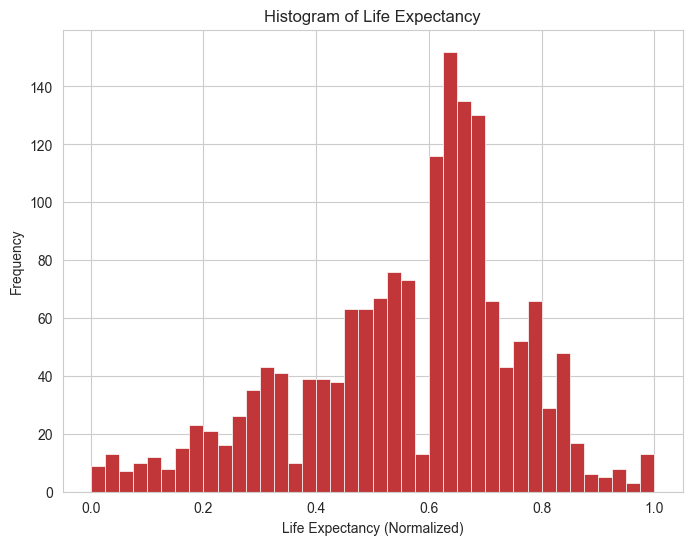

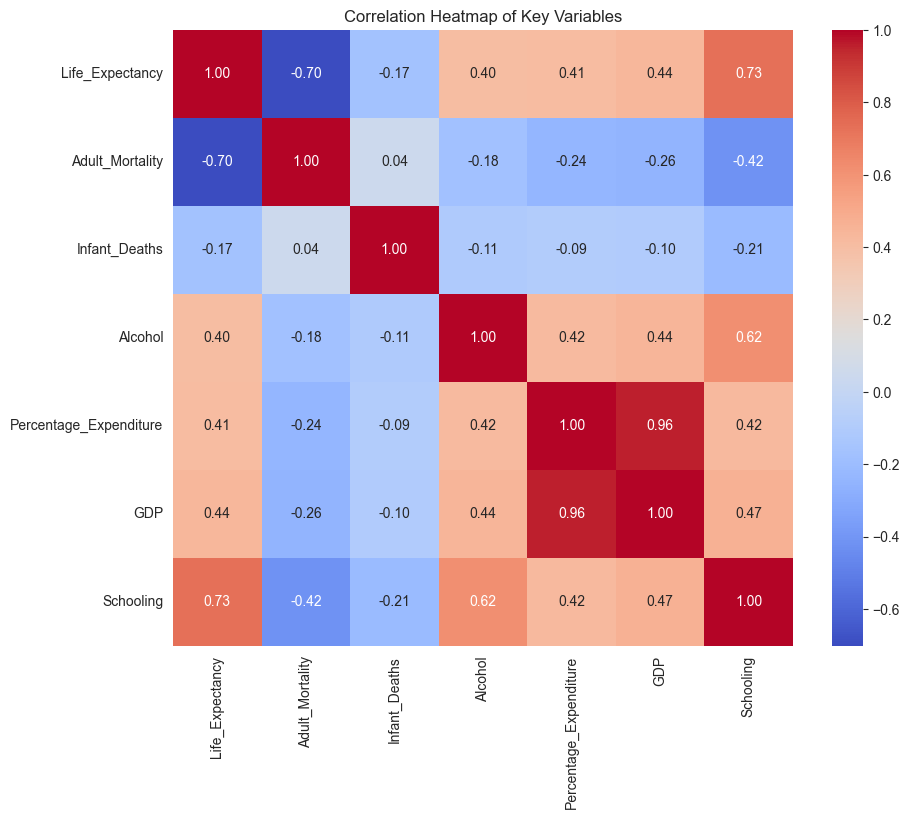

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar um histograma para 'Life_Expectancy'
x = formatted_data['Life_Expectancy']

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(x, bins=40, linewidth=0.5, edgecolor="white")
ax.set_title("Histogram of Life Expectancy")
ax.set_xlabel("Life Expectancy (Normalized)")
ax.set_ylabel("Frequency")
plt.show()

# Plotar a matriz de correlação
correlation_matrix = formatted_data[key_numeric_variables].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap of Key Variables")
plt.show()


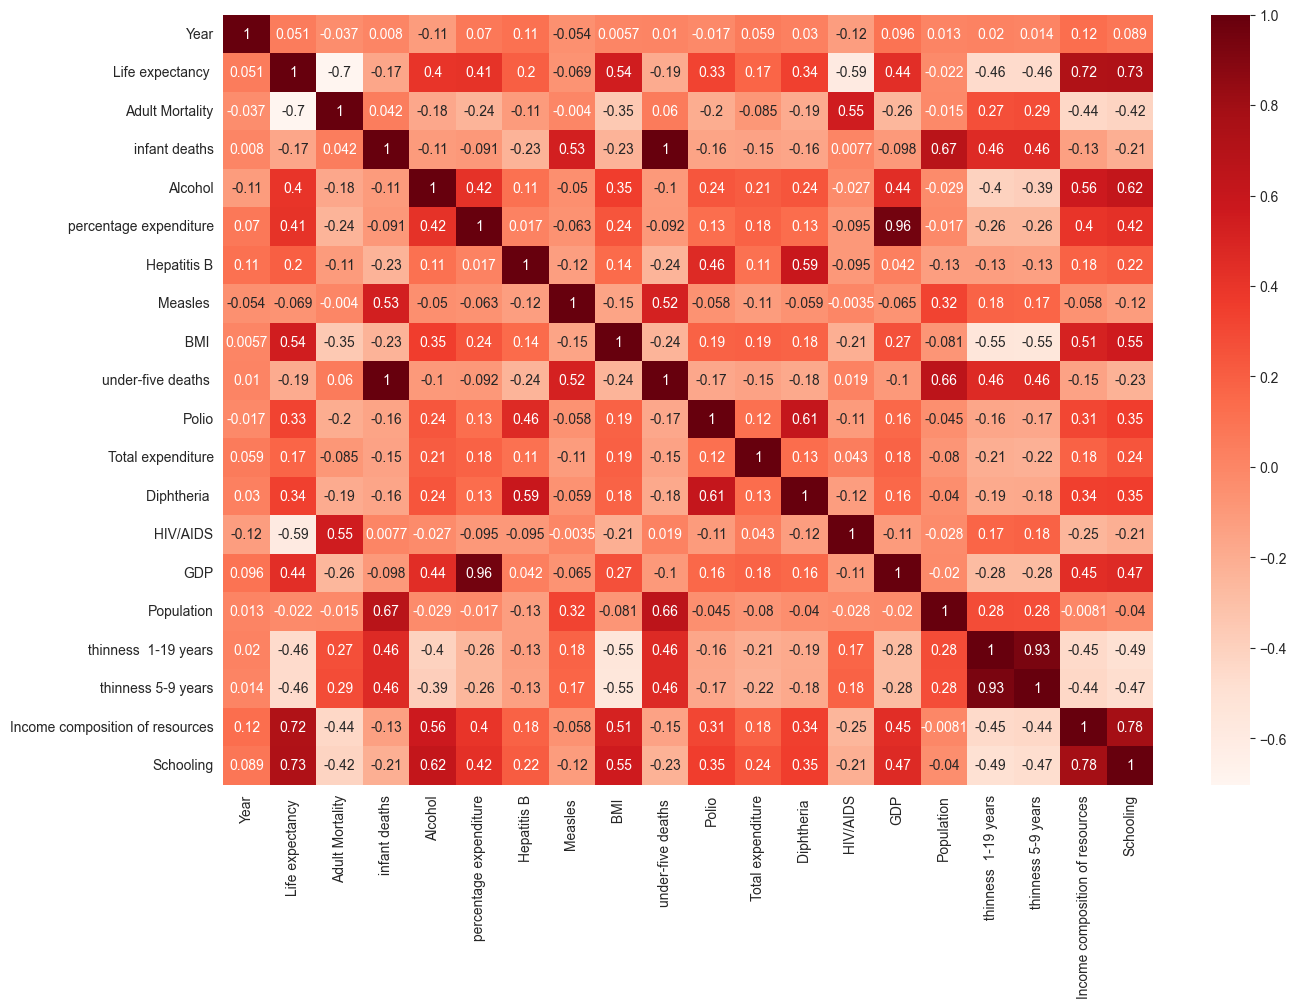

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(),annot=True,cmap='Reds')
plt.show()

In [12]:
import plotly.express as px

fig = px.violin(
    data,
    x='Status',
    y='Life expectancy',  # Nome correto da coluna
    color='Status',
    template='plotly_dark',
    box=True,
    title='Life Expectancy Based on Country Status'
)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
fig=px.line(data.sort_values(by='Year'),x='Year',y='Life expectancy',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [13]:
px.scatter(data,y='Adult Mortality',x='Life expectancy',color='Country',size='Life expectancy',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Adult Mortality')


NameError: name 'px' is not defined

In [ ]:
px.scatter_3d(data.sort_values(by='Year'),y='Adult Mortality',x='Life expectancy',z='infant deaths',size='Life expectancy',template='plotly_dark',color='Country')


---

In [14]:
# first i see some column name with empty space i will fixed it to ease of use

data.columns = data.columns.str.strip()

# create function to visualized categorical column using count plot

def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    5) top parameter i use it to specify indexes i want to see it
    """
    if x_axis: # if we neet to visualized in x-axis
        order = train[x_axis].value_counts().iloc[:top].index
        
    else : # if we neet to visualized in y-axis
        order = train[y_axis].value_counts().iloc[:top].index
        
    graph = sns.countplot(x = x_axis, y = y_axis, data = train, hue = hue, order = order)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [15]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name):
    """
    1) input : column name, column data type must be object or categorical
    2) output : circle chart that shows size of each unique values and percentage 
    """
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [16]:
def histogram(column_name):
    
    # 1- set figure size
    plt.figure(figsize=(15, 20))

    # 2- loop over services list to plot columns
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) # create sub-plot

        sns.histplot(x = col, data = train, kde = True)
        
        plt.title(col) # set title to each plot
        plt.xlabel("") # replace x label with empty string
        plt.ylabel("") # replace y label with empty string

    # 3- set layout between two plots
    plt.tight_layout(pad = 2)

    plt.show()

In [18]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.boxplot(x = x_axis, y = y_axis, data = train)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [ ]:
# first i neet to split data to train and teste

# import need function
from sklearn.model_selection import train_test_split

# spliting data to train and test
train, test =  train_test_split(data, test_size = 0.2, random_state = 42)

In [20]:
# see shape of train and test data

print(f"Shape of train data is : {train.shape}")
print("-" * 30)
print(f"Shape of test data is : {test.shape}")

Shape of train data is : (1319, 22)
------------------------------
Shape of test data is : (330, 22)


In [21]:
train["Country"].nunique()


132

In [22]:
train["Country"].unique()


array(['Ghana', 'Argentina', 'Peru', 'Zimbabwe', 'Thailand', 'Iraq',
       'Honduras', 'Malaysia', 'Kenya', 'India', 'Botswana', 'Germany',
       'Cabo Verde', 'Maldives', 'Seychelles', 'Togo', 'Luxembourg',
       'Ecuador', 'Nicaragua', 'Solomon Islands', 'Djibouti', 'Senegal',
       'Jamaica', 'Spain', 'Samoa', 'Lesotho', 'Eritrea', 'Uzbekistan',
       'France', 'Tonga', 'Georgia', 'Uruguay', 'Ireland', 'Nepal',
       'Burundi', 'Rwanda', 'Mongolia', 'Paraguay', 'Brazil', 'Malawi',
       'Comoros', 'Panama', 'Sierra Leone', 'Bosnia and Herzegovina',
       'Indonesia', 'Gabon', 'Turkey', 'Colombia', 'Montenegro', 'China',
       'Zambia', 'Serbia', 'Uganda', 'Mauritius', 'Guinea', 'Bhutan',
       'Ukraine', 'Australia', 'Turkmenistan', 'Guatemala', 'Azerbaijan',
       'Sri Lanka', 'Mali', 'Cameroon', 'Israel', 'Netherlands',
       'Russian Federation', 'Latvia', 'Poland', 'Nigeria',
       'Trinidad and Tobago', 'Papua New Guinea', 'Greece', 'Philippines',
       'Jordan', 

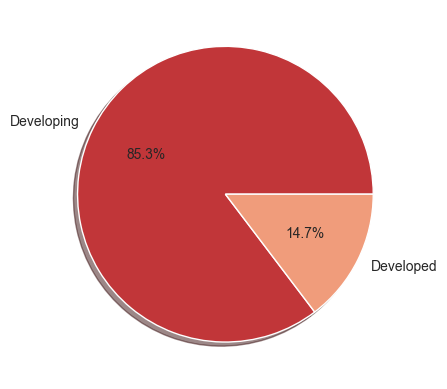

In [ ]:
train["Status"].unique()

# number of unique values is small, which is appropriate with pie plot

pie_plot("Status") # call function i create it in cell 


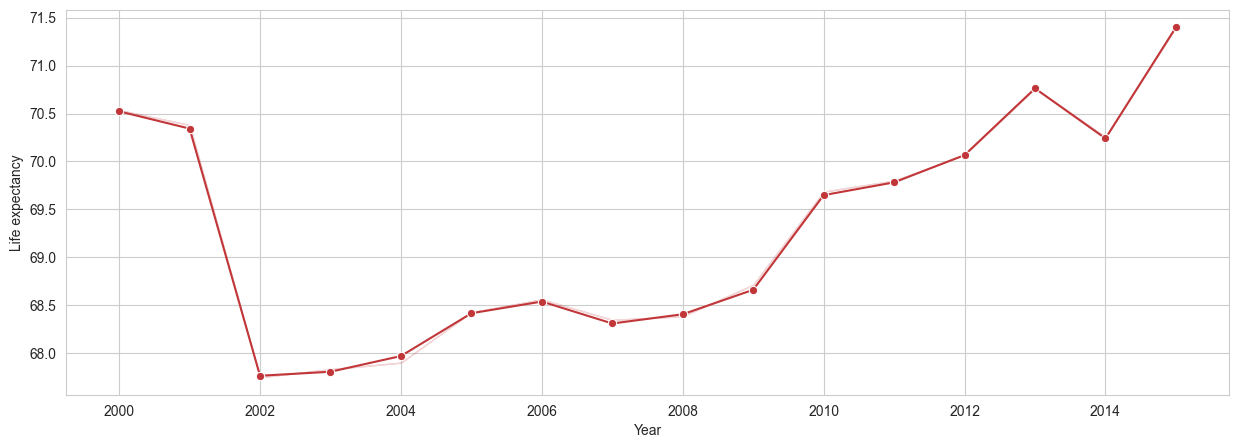

In [ ]:
# see the impact of "year" on "Life Expectancy"

# set figure size
plt.figure(figsize=(15,5))

sns.lineplot(x = 'Year', y = 'Life expectancy', data = train, marker = 'o' ,errorbar=('ci', False))
plt.show()

In [1]:
# create list of numerical column

numerical_colum = train.select_dtypes(exclude = object).columns.tolist()
numerical_colum.remove("Year") # remove year column from list

# call function i create it in cell 14

histogram(numerical_colum) # numerical_column list from cell 29

NameError: name 'train' is not defined

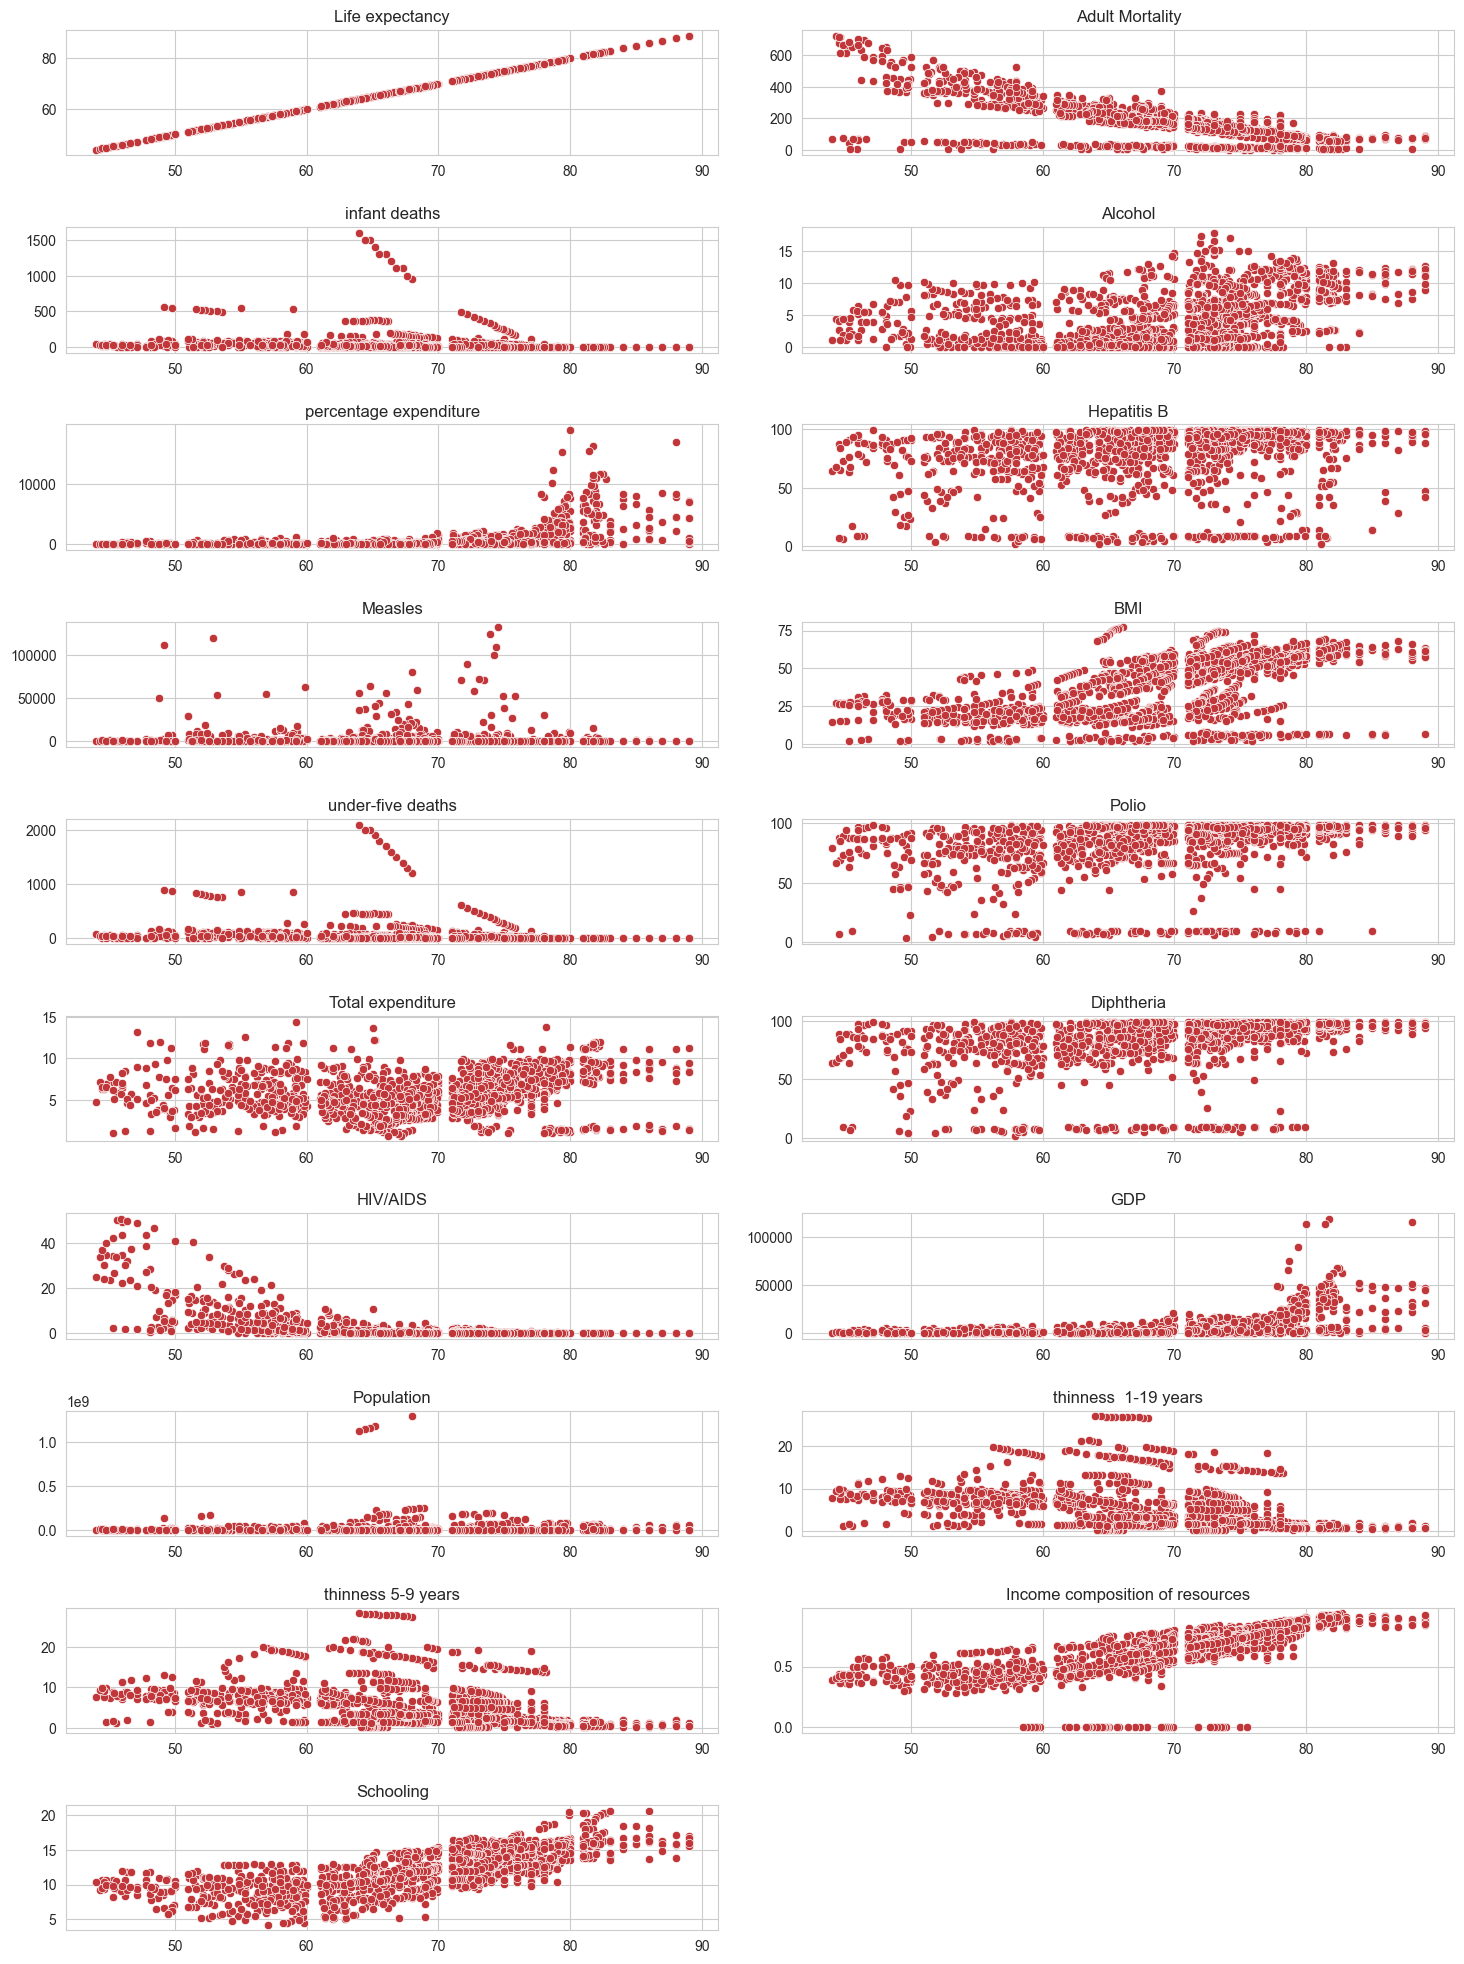

In [ ]:
def create_scatterplot(x_axis, column_name):
    
    # 1- set figure size
    plt.figure(figsize=(15, 20))

    # 2- loop over services list to plot columns
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) # create sub-plot
    
        sns.scatterplot(x = x_axis, y = col, data = data)
        
        plt.title(col) # set title to each plot
        plt.xlabel("") # replace x label with empty string
        plt.ylabel("") # replace y label with empty string

    # 3- set layout between two plots
    plt.tight_layout(pad = 2)

    plt.show()

create_scatterplot("Life expectancy", numerical_colum) 


In [ ]:
# first visualize correlation matrix between numerical columns

plt.figure(figsize = (16,8))
sns.heatmap(train.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

---

# Data Preprocessing


In [ ]:
# import libraries to model

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
# create object from labelencoder

encoder = LabelEncoder()

for column in ["Country", "Status"]:
    train[column] = encoder.fit_transform(train[column])
    test[column] = encoder.fit_transform(test[column])

In [ ]:
# see sample of training data

train.sample(2)

NameError: name 'train' is not defined

In [ ]:
# see sample of test data

test.sample(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
170,11,2007,1,69.6,181,0,7.24,69.630510,96,0,...,97,4.76,96,0.6,4324.876427,29847.0,3.5,3.5,0.700,12.8
231,15,2000,1,47.8,647,2,5.37,250.891648,86,2672,...,97,4.64,97,38.8,3349.688230,172834.0,12.3,12.2,0.559,11.7


In [ ]:
# Splitting training into Indipendent and Dependent Variable

Train = train[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths']]
Target = train["Life expectancy"]

In [ ]:
# Splitting testing into Indipendent and Dependent Variable

x_test = test[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths']]
y_test = test["Life expectancy"]

In [ ]:
# Scaling train data using min max scaler

scaler = MinMaxScaler()

Train= scaler.fit_transform(Train)
x_test= scaler.transform(x_test)

--- 

# Modeling

In [ ]:
# Create an empty DataFrame for modeling
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score'])

# Define the model selection function
def select_model(model_name):
    global Modeling  # Access the global DataFrame
    
    # initialize your model object 
    model = model_name
    
    # Fit the model on the training data
    model.fit(Train, Target)
    
    # Calculate the score of the model on the training data
    train_score = model.score(Train, Target)
    print(f"Score of the {model_name} model on the training data is: {train_score}")
    
    # Make predictions on the test data
    predictions = np.round(model.predict(x_test), decimals = 1)
    
    # See R2 score on the test data
    test_r2_score = r2_score(y_test, predictions)
    print(f"R2 score of the {model_name} model on the test data is: {test_r2_score}")
    
    # Create a DataFrame for the current model's scores
    model_scores = pd.DataFrame({'Model': [model_name], 'Training Score': [train_score], 'Test R2 Score': [test_r2_score]})
    
    # Concatenate the model_scores DataFrame with the Modeling DataFrame
    Modeling = pd.concat([Modeling, model_scores], ignore_index = True)

In [ ]:
select_model(LinearRegression())
select_model(SVR(C = 9.0, epsilon = 0.9, kernel = 'rbf'))
select_model(RandomForestRegressor(n_estimators = 100, max_depth=7, min_samples_split=5))
select_model(GradientBoostingRegressor(n_estimators = 100, max_depth = 6, min_samples_split = 5))


Score of the LinearRegression() model on the training data is: 0.7803710245327624
R2 score of the LinearRegression() model on the test data is: 0.7933006267304819
Score of the SVR(C=9.0, epsilon=0.9) model on the training data is: 0.918684715058084
R2 score of the SVR(C=9.0, epsilon=0.9) model on the test data is: 0.9086648611036997


C:\Users\Avelino\AppData\Local\Temp\ipykernel_11664\3412572247.py:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Score of the RandomForestRegressor(max_depth=7, min_samples_split=5) model on the training data is: 0.9636357017588079
R2 score of the RandomForestRegressor(max_depth=7, min_samples_split=5) model on the test data is: 0.9318197135920132
Score of the GradientBoostingRegressor(max_depth=6, min_samples_split=5) model on the training data is: 0.9927270076017308
R2 score of the GradientBoostingRegressor(max_depth=6, min_samples_split=5) model on the test data is: 0.937742720506509


--- 

# Evaluating Results

In [ ]:
# rename modle name
names = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'GradientBoostingRegressor']

# loop over list to rename model
for i in range(4):
    Modeling.rename(index = {i : names[i]}, inplace = True)
    
# drop model column
Modeling.drop(columns= "Model", inplace = True)

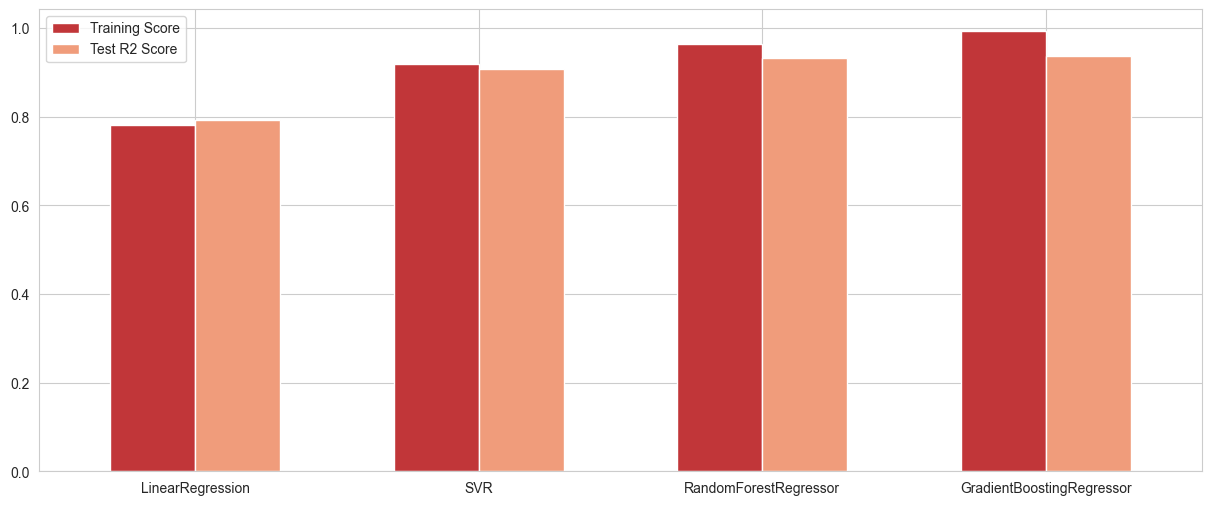

In [ ]:
Modeling.plot(kind = "bar", figsize = (15,6), width = 0.6)
plt.xticks(rotation = 0)
plt.show()